# Gerekli Kütüphaneleri Yükleme

In [1]:
# Gerekli kütüphaneleri yükleme
import cv2
import os
import time
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


## Model ve Ağırlıkları Yükleme

In [2]:
# Model ve ağırlıkları yükleme

# model_path = r'C:\Users\WaLFaLaR\tez\manim-main\updated_model.keras'  # Model dosyasının yolu
# weights_path = r'C:\Users\WaLFaLaR\tez\manim-main\updated_model_weights.weights.h5'  # Ağırlık dosyasının yolu

# Model ve ağırlıkları yükleme
model_path = 'trained_model.keras'  # Model dosyasının yolu
weights_path = 'model_weights.weights.h5'  # Ağırlık dosyasının yolu

# Eğitimli model ve ağırlıkların yüklenmesi
model = load_model(model_path)
model.load_weights(weights_path)

print("Model ve ağırlıkları yüklendi.")


Model ve ağırlıkları yüklendi.


## Görüntüleri Hazırlama ve İşleme

In [3]:
def prepare_images(folder_path):
    images = []
    labels = []
    image_names = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, (170, 350))  # Modelin beklediği giriş boyutuna göre yeniden boyutlandırma
            img = np.expand_dims(img, axis=0)  # Batch boyutunu eklemek için genişletme
            images.append(img)
            label = filename.split('_')[1]  # Dosya adından etiketi ayırma
            labels.append(int(label))  # Etiketi integer olarak kaydetme
            image_names.append(filename)
    return np.vstack(images), labels, image_names

folder_path = r'C:\\Users\\WaLFaLaR\\tez\\veri\\ssveri'  # Görüntülerin bulunduğu klasörün yolu
X, y_true, image_names = prepare_images(folder_path)

print(f"Görüntüler hazırlandı. Toplam görüntü sayısı: {len(X)}")


Görüntüler hazırlandı. Toplam görüntü sayısı: 100


## Görüntüleri Model ile Tahmin Etme

In [4]:



# Görüntüleri işleme fonksiyonu
def preprocess_image(image_path):
    # Görüntüyü yükle
    img = cv2.imread(image_path)
    # Görüntüyü yeniden boyutlandır (modelin kabul ettiği giriş boyutlarına göre ayarlayın)
    img = cv2.resize(img, (170, 350))  # Örnek olarak 170x350 boyutunda
    # Görüntüyü normalize edin (genellikle 0-1 aralığında)
    img = img / 255.0
    # Gerekirse batch boyutunu ekleyin
    img = np.expand_dims(img, axis=0)
    return img

# Tahmin yapmak istediğiniz görüntülerin bulunduğu dizin
image_directory = r'C:\\Users\\WaLFaLaR\\tez\\veri\\ssveri'

# Görüntülerin bulunduğu dizindeki tüm dosyaları al
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Tahminleri saklamak için bir liste oluşturun
predictions = []

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    img = preprocess_image(image_path)
    # Model ile tahmin yapın
    prediction = model.predict(img)
    # Softmax kullanarak tahmin sonuçlarını normalize edin
    normalized_prediction = np.squeeze(np.exp(prediction) / np.sum(np.exp(prediction), axis=-1))
    predictions.append((image_file, normalized_prediction))

# Tahminleri yazdır
for image_file, prediction in predictions:
    print(f"Görüntü: {image_file}, Tahmin: {prediction}")
    
predictions = model.predict(X)

# Tahmin sonuçlarını yorumlama veya kullanma işlemleri burada yapılabilir
for i in range(len(predictions)):
    predicted_label = np.argmax(predictions[i])  # En yüksek olasılığa sahip sınıfın indeksini al
    confidence = predictions[i][predicted_label]  # Tahmin edilen sınıfın olasılık değeri
    confidence_percentage = confidence * 100  # Yüzde cinsinden hesaplama
    print(f"{image_names[i]} -> Tahmin: {predicted_label}, Gerçek: {y_true[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

Görüntü: foto_7_(34-25).jpg, Tahmin: [0.08561859 0.08759505 0.08561838 0.08561961 0.08562949 0.08561823
 0.08561846 0.2274453  0.08561843 0.08561834]
Görüntü: foto_7_(34-26).jpg, Tahmin: [0.08535411 0.08547257 0.0853541  0.08535416 0.08535417 0.0853541
 0.0853541  0.23169446 0.08535411 0.0853541 ]
Görüntü: foto_7_(34-27).jpg, Tahmin: [0.08533695 0.08533836 0.08533695 0.08533695 0.08533695 0.08533695
 0.08533695 0.23196602 0.08533695 0.08533695]
Görüntü: foto_7_(34-28).jpg, Tahmin: [0.08533698 0.08533855 0.08533698 0.08533698 0.08533698 0.08533698
 0.08533698 0.23196565 0.08533698 0.08533698]
Görüntü: foto_7_(34-29).jpg, Tahmin: [0.08533695 0.08533833 0.08533695 0.08533695 0.08533695 0.08533695
 0.08533695 0.2319661  0.08533695 0.08533695]
Görüntü: foto_7_(36-07).jpg, Tahmin: [0.08542652 0.08594196 0.08542474 0.08542834 0.08549578 0.08542467
 0.08542467 0.23057239 0.08542481 0.08543608]
Görüntü: foto_7_(36-08).jpg, Tahmin: [0.0853455  0.08539653 0.08534534 0.08534545 0.08535131 0.085345

## Görüntü Analiz Sonuçlarını Görselleştirme ve Değerlendirme

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

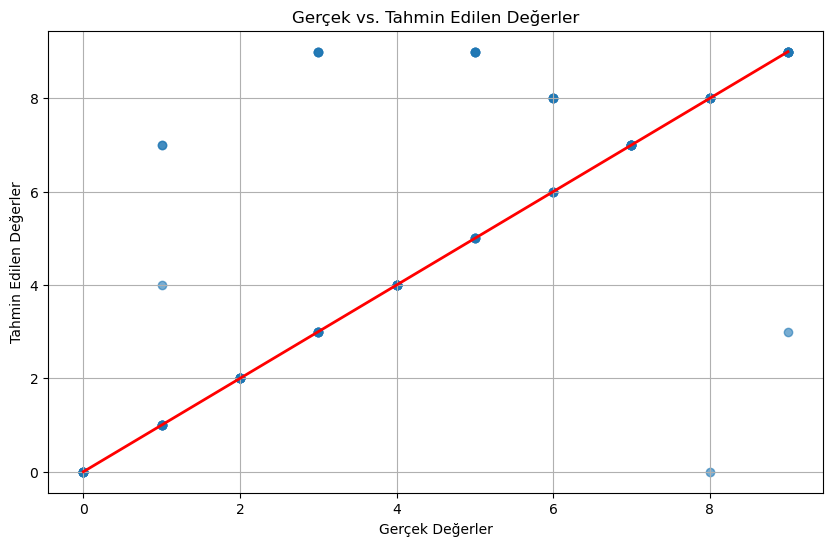

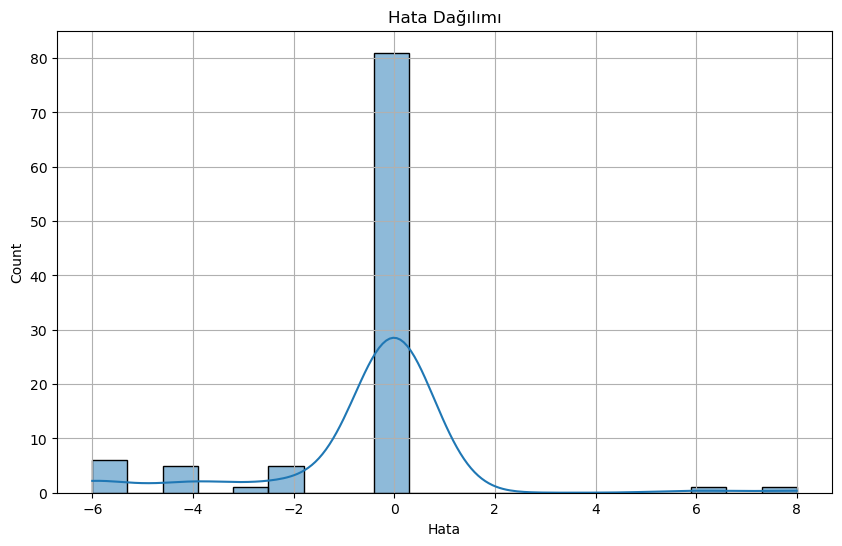

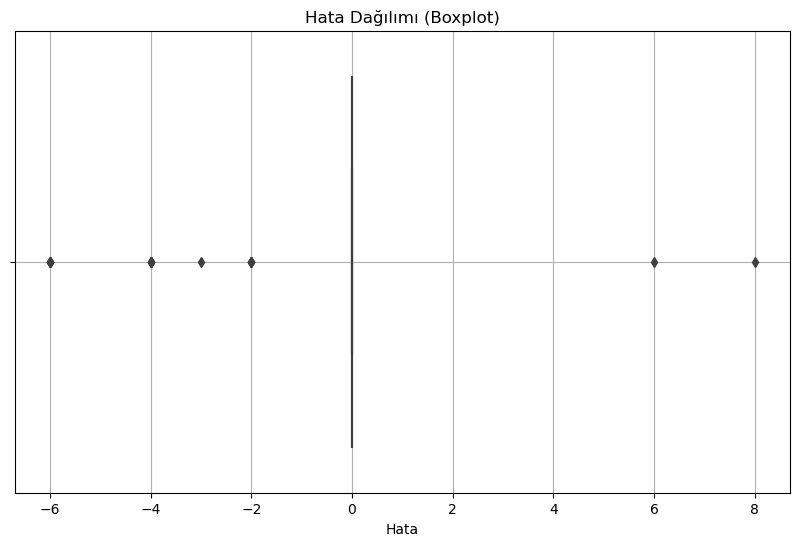

In [5]:
# Görüntüleri işleyip tahmin yap
predictions = []
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predictions.append(prediction)

# Tahmin sonuçlarını işleme
y_pred = [np.argmax(pred) for pred in predictions]

# Gerçek değerler ve tahmin edilen değerler ile DataFrame oluşturma
df = pd.DataFrame({'Gerçek Değerler': y_true, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot ile Gerçek vs. Tahmin edilen değerleri görselleştir
plt.figure(figsize=(10, 6))
plt.scatter(df['Gerçek Değerler'], df['Tahmin Edilen Değerler'], alpha=0.6)
plt.plot([df['Gerçek Değerler'].min(), df['Gerçek Değerler'].max()], 
         [df['Gerçek Değerler'].min(), df['Gerçek Değerler'].max()], 
         color='red', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.grid(True)
plt.show()

# Hata dağılımını görselleştirme (Histogram)
hatalar = df['Gerçek Değerler'] - df['Tahmin Edilen Değerler']
plt.figure(figsize=(10, 6))
sns.histplot(hatalar, bins=20, kde=True)
plt.xlabel('Hata')
plt.title('Hata Dağılımı')
plt.grid(True)
plt.show()

# Hata dağılımı (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=hatalar)
plt.xlabel('Hata')
plt.title('Hata Dağılımı (Boxplot)')
plt.grid(True)
plt.show()

## Model Performansını Değerlendirmek icin test

In [6]:
plt.show()

"""## Modelin Kullanılması ve Tahminlerin Görselleştirilmesi"""

# Görüntüyü yükleyin ve hazırlayın
def load_and_prepare_image(img_path, target_size=(170, 350)):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"{img_path} yolunda dosya bulunamadı.")
    
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekleyin
    img_array /= 255.0  # Normalizasyon (modelinizin gereksinimlerine göre ayarlayın)
    return img_array

# Görüntü yükleyin ve hazırlayın
img_path = r'C:\Users\WaLFaLaR\tez\veri\son7\ortss\foto_8_(30-42).jpg'
prepared_image = load_and_prepare_image(img_path, target_size=(170, 350))
print(prepared_image)

# Modeli kullanarak tahmin yapın
predictions = model.predict(prepared_image)

# Tahmin sonucunu yazdırın
print("Predictions:", predictions)

# En yüksek olasılığı ve bu olasılığın hangi sınıfa ait olduğunu bulma
predicted_class_index = np.argmax(predictions)
predicted_class_probability = np.max(predictions)

print(f"Tahmin edilen sınıf endeksi: {predicted_class_index}")
print(f"Tahmin edilen sınıf olasılığı: {predicted_class_probability}")

# Sınıf isimleri (modelinizin eğitildiği sınıflara göre ayarlayın)
class_names = ['sayı=0', 'sayı=1', 'sayı=2', 'sayı=3', 'sayı=4', 'sayı=5', 'sayı=6', 'sayı=7', 'sayı=8', 'sayı=9']

predicted_class_name = class_names[predicted_class_index]
print(f"Tahmin edilen sınıf adı: {predicted_class_name}")

[[[[0.34901962 0.34117648 0.36078432]
   [0.34901962 0.34117648 0.36078432]
   [0.34901962 0.34117648 0.36078432]
   ...
   [0.34509805 0.34509805 0.38431373]
   [0.34509805 0.34509805 0.38039216]
   [0.34509805 0.34509805 0.38039216]]

  [[0.34509805 0.3372549  0.35686275]
   [0.34509805 0.3372549  0.35686275]
   [0.34509805 0.3372549  0.36078432]
   ...
   [0.34901962 0.34509805 0.38431373]
   [0.34901962 0.34509805 0.38431373]
   [0.34901962 0.34509805 0.38431373]]

  [[0.34509805 0.3372549  0.35686275]
   [0.34509805 0.3372549  0.35686275]
   [0.34117648 0.3372549  0.35686275]
   ...
   [0.34117648 0.34117648 0.3764706 ]
   [0.34117648 0.34117648 0.37254903]
   [0.34117648 0.34117648 0.37254903]]

  ...

  [[0.20784314 0.21176471 0.24313726]
   [0.20784314 0.21176471 0.24313726]
   [0.20784314 0.21568628 0.24313726]
   ...
   [0.20392157 0.21568628 0.21960784]
   [0.20392157 0.21568628 0.21960784]
   [0.20392157 0.21568628 0.21960784]]

  [[0.20392157 0.21176471 0.24313726]
   [0.2

## Sürekli analiz etme 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Görüntü: foto_6_(01-58).jpg
  Gerçek Değer: 6
  Tahmin: [0.00553207 0.02807629 0.5348764  0.02352623 0.04779198 0.02351375
 0.19614597 0.00706631 0.12884909 0.0046219 ]


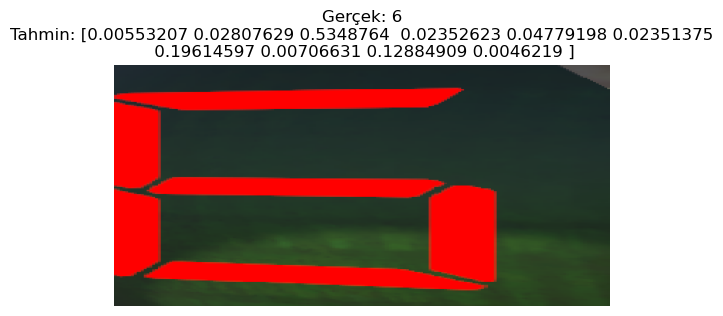

Görüntü silindi: foto_6_(01-58).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Görüntü: foto_7_(02-01).jpg
  Gerçek Değer: 7
  Tahmin: [0.02630128 0.22554524 0.06650057 0.01667255 0.04941152 0.01753804
 0.03185237 0.5217232  0.03454662 0.00990867]


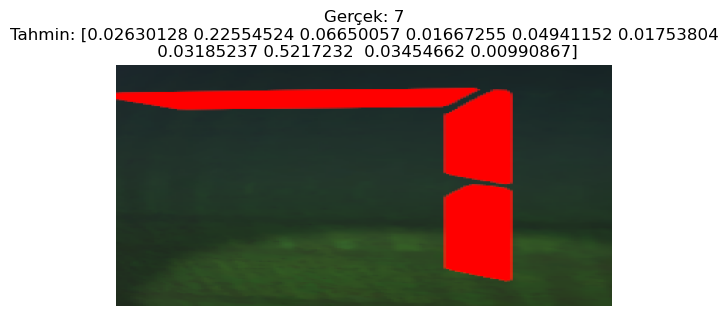

Görüntü silindi: foto_7_(02-01).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Görüntü: foto_8_(02-04).jpg
  Gerçek Değer: 8
  Tahmin: [0.0073762  0.05053277 0.3647427  0.02402867 0.09818331 0.02997809
 0.22744623 0.01065503 0.17552993 0.01152699]


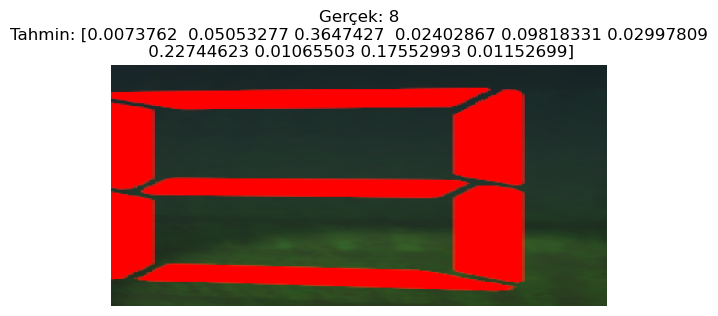

Görüntü silindi: foto_8_(02-04).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Görüntü: foto_9_(02-07).jpg
  Gerçek Değer: 9
  Tahmin: [0.00731814 0.0628645  0.31445852 0.03838687 0.1502219  0.05229409
 0.19744627 0.01585474 0.14067362 0.02048131]


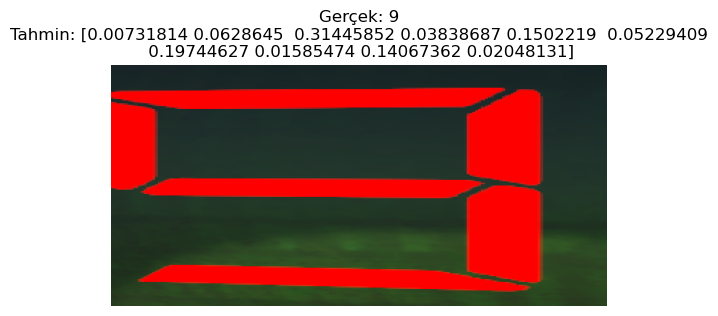

Görüntü silindi: foto_9_(02-07).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Görüntü: foto_0_(02-10).jpg
  Gerçek Değer: 0
  Tahmin: [0.36358115 0.14931816 0.11621286 0.01391209 0.0061801  0.0212695
 0.12542355 0.08410799 0.09750436 0.02249021]


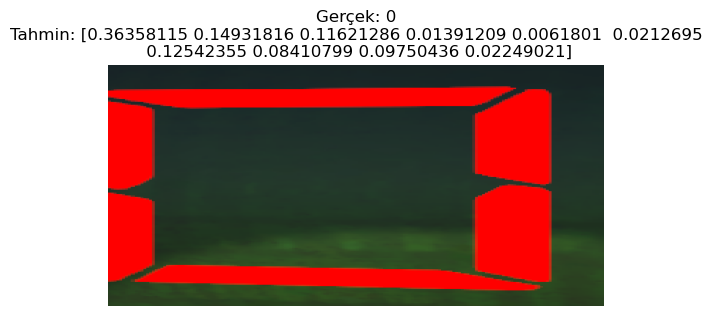

Görüntü silindi: foto_0_(02-10).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Görüntü: foto_1_(02-13).jpg
  Gerçek Değer: 1
  Tahmin: [0.04127956 0.31121197 0.0876022  0.03306036 0.13932352 0.0244497
 0.05348981 0.23684828 0.04360457 0.02913006]


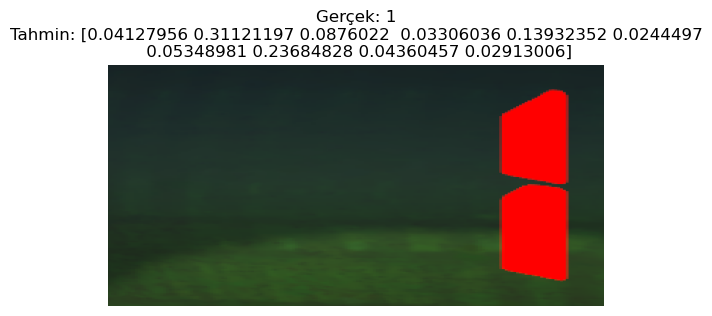

Görüntü silindi: foto_1_(02-13).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Görüntü: foto_2_(02-16).jpg
  Gerçek Değer: 2
  Tahmin: [0.00253333 0.06067143 0.4357102  0.03973783 0.18861364 0.04252848
 0.12454816 0.01723772 0.0770423  0.01137699]


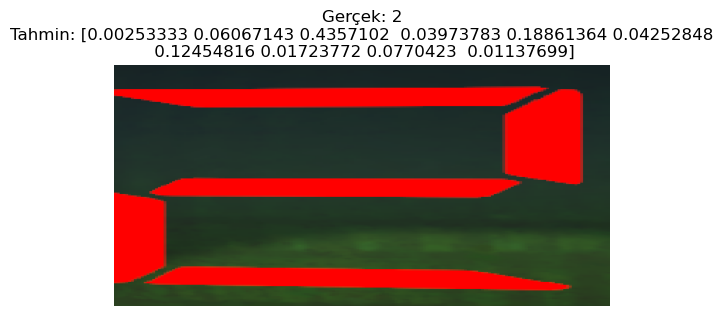

Görüntü silindi: foto_2_(02-16).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Görüntü: foto_3_(02-19).jpg
  Gerçek Değer: 3
  Tahmin: [0.00458441 0.04583542 0.3939738  0.0538236  0.1126594  0.05718951
 0.18030064 0.01322103 0.12366921 0.01474298]


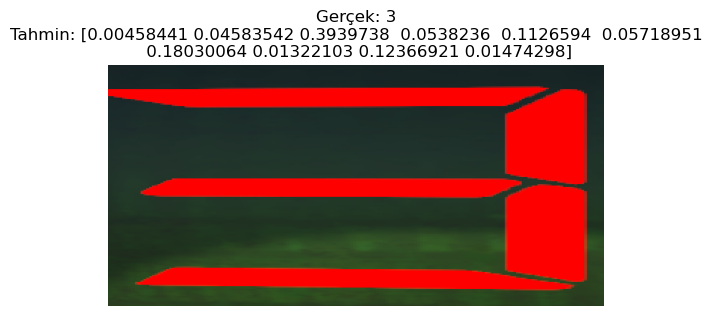

Görüntü silindi: foto_3_(02-19).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Görüntü: foto_4_(02-22).jpg
  Gerçek Değer: 4
  Tahmin: [2.5058878e-04 2.5402665e-02 6.2338514e-03 2.6656643e-03 9.1575211e-01
 6.8539320e-03 1.5788643e-02 4.1278261e-03 1.4267360e-02 8.6573837e-03]


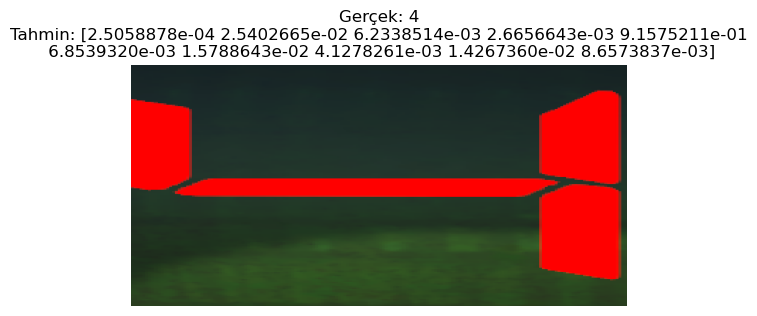

Görüntü silindi: foto_4_(02-22).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Görüntü: foto_5_(02-25).jpg
  Gerçek Değer: 5
  Tahmin: [0.00382471 0.03339224 0.3967055  0.04711796 0.10604244 0.08182437
 0.20335    0.01108378 0.10457262 0.01208637]


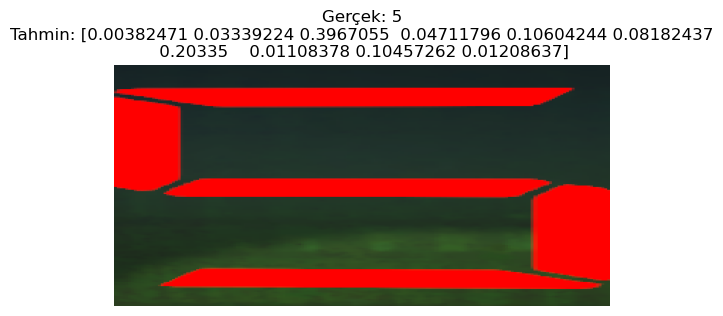

Görüntü silindi: foto_5_(02-25).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Görüntü: foto_6_(02-28).jpg
  Gerçek Değer: 6
  Tahmin: [0.00343328 0.02039622 0.49827552 0.02563834 0.04897052 0.03430573
 0.23879693 0.005877   0.11983881 0.00446761]


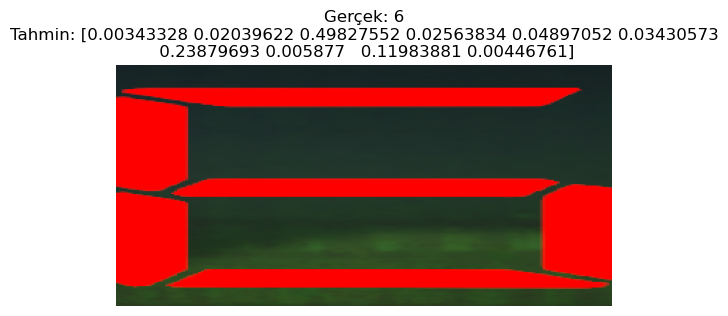

Görüntü silindi: foto_6_(02-28).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Görüntü: foto_7_(02-31).jpg
  Gerçek Değer: 7
  Tahmin: [0.01276956 0.14754307 0.01393269 0.0109677  0.01222421 0.00696398
 0.00602966 0.7764239  0.00744288 0.00570232]


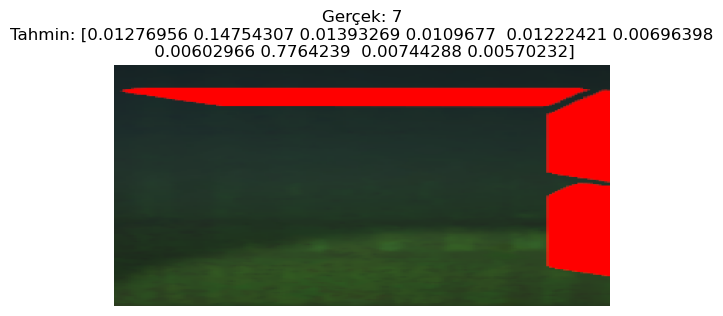

Görüntü silindi: foto_7_(02-31).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Görüntü: foto_8_(02-34).jpg
  Gerçek Değer: 8
  Tahmin: [0.00553242 0.03053047 0.4069646  0.02216394 0.06265057 0.02751005
 0.24575831 0.00688599 0.18376715 0.00823648]


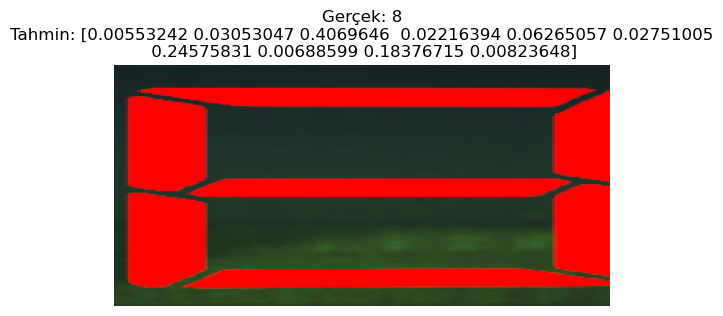

Görüntü silindi: foto_8_(02-34).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Görüntü: foto_9_(02-37).jpg
  Gerçek Değer: 9
  Tahmin: [0.00529243 0.07334222 0.2444005  0.06086291 0.2570676  0.07700478
 0.12773132 0.02526408 0.09514257 0.03389157]


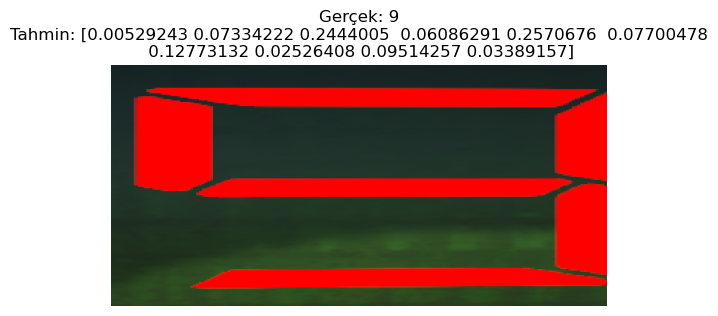

Görüntü silindi: foto_9_(02-37).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Görüntü: foto_0_(02-40).jpg
  Gerçek Değer: 0
  Tahmin: [0.4293378  0.1509752  0.07412239 0.0132961  0.00475981 0.01424652
 0.08323044 0.12568457 0.07660653 0.0277407 ]


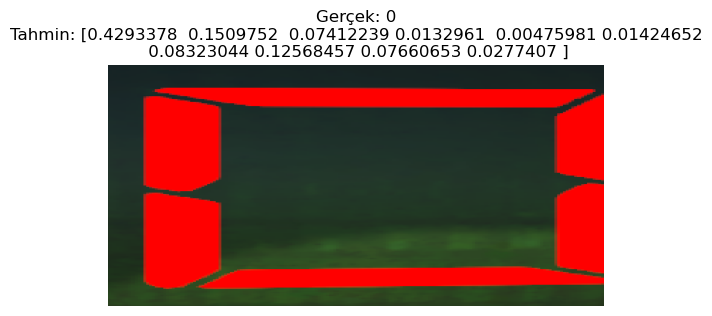

Görüntü silindi: foto_0_(02-40).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Görüntü: foto_1_(02-43).jpg
  Gerçek Değer: 1
  Tahmin: [0.01706277 0.56362456 0.03282016 0.01602247 0.14772817 0.01496073
 0.01345512 0.16103747 0.01991363 0.01337496]


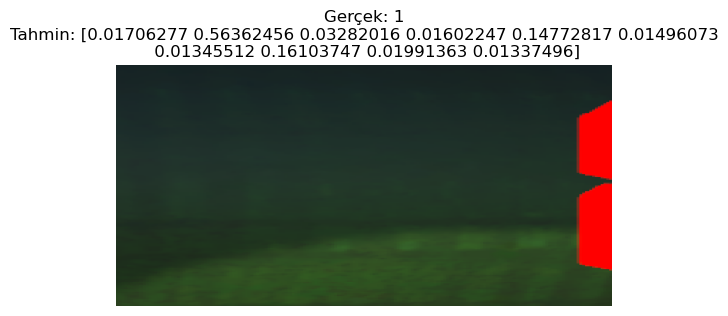

Görüntü silindi: foto_1_(02-43).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Görüntü: foto_2_(02-46).jpg
  Gerçek Değer: 2
  Tahmin: [0.00196748 0.01268629 0.6535235  0.01769656 0.03072562 0.02147897
 0.17289113 0.00350526 0.08361073 0.00191453]


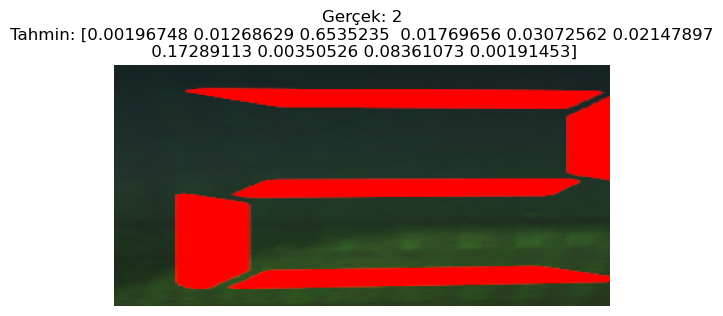

Görüntü silindi: foto_2_(02-46).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Görüntü: foto_3_(02-49).jpg
  Gerçek Değer: 3
  Tahmin: [0.00552063 0.04791233 0.435895   0.08284044 0.08592247 0.07367018
 0.14485063 0.02380766 0.08547334 0.01410734]


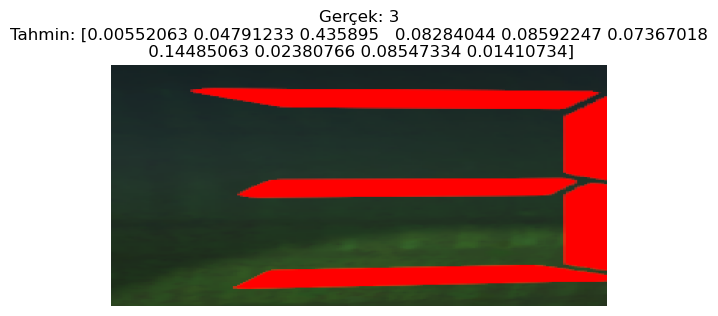

Görüntü silindi: foto_3_(02-49).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Görüntü: foto_4_(02-52).jpg
  Gerçek Değer: 4
  Tahmin: [6.2479253e-04 6.5064617e-02 1.7430389e-02 3.8995100e-03 8.5527217e-01
 6.7388425e-03 1.4128183e-02 1.5780481e-02 1.5274445e-02 5.7865470e-03]


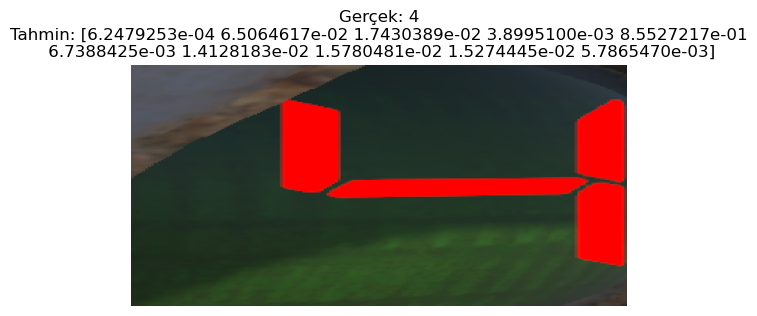

Görüntü silindi: foto_4_(02-52).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Görüntü: foto_5_(02-55).jpg
  Gerçek Değer: 5
  Tahmin: [0.01575949 0.06581081 0.3216738  0.05455405 0.12846804 0.06633491
 0.16771285 0.01910718 0.13612732 0.02445151]


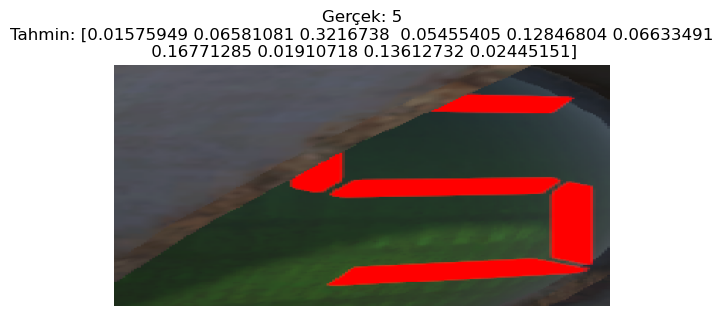

Görüntü silindi: foto_5_(02-55).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Görüntü: foto_6_(02-58).jpg
  Gerçek Değer: 6
  Tahmin: [0.02066736 0.02673151 0.30451092 0.04107192 0.05874671 0.04958573
 0.2710842  0.00750369 0.20273863 0.01735936]


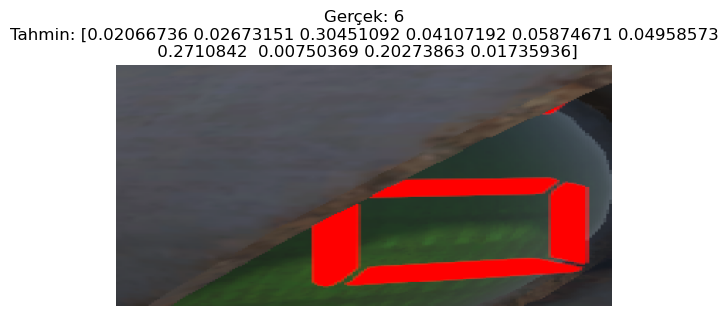

Görüntü silindi: foto_6_(02-58).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Görüntü: foto_0_(03-04).jpg
  Gerçek Değer: 0
  Tahmin: [0.10964958 0.10560596 0.17109245 0.0908728  0.06876883 0.06821081
 0.11094176 0.07326473 0.11919207 0.082401  ]


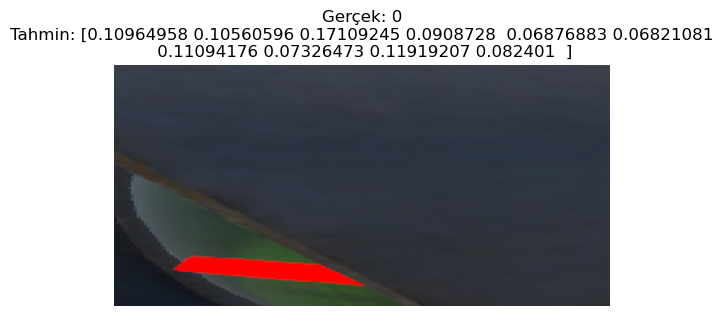

Görüntü silindi: foto_0_(03-04).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Görüntü: foto_1_(03-08).jpg
  Gerçek Değer: 1
  Tahmin: [0.05052044 0.31833625 0.08296987 0.05313243 0.13416746 0.0486637
 0.04183695 0.17304738 0.05220697 0.0451186 ]


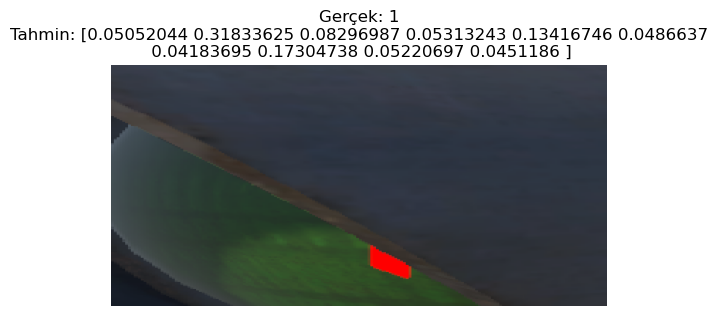

Görüntü silindi: foto_1_(03-08).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Görüntü: foto_2_(03-11).jpg
  Gerçek Değer: 2
  Tahmin: [0.02176365 0.0602133  0.36918917 0.04607479 0.09327798 0.04817385
 0.17618991 0.01705885 0.14728765 0.02077082]


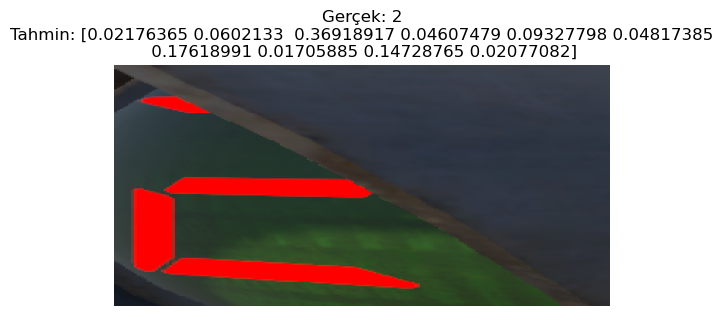

Görüntü silindi: foto_2_(03-11).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Görüntü: foto_3_(03-14).jpg
  Gerçek Değer: 3
  Tahmin: [0.01553109 0.07819544 0.37787375 0.05198345 0.10635415 0.03582301
 0.14917633 0.02044758 0.14291465 0.0217006 ]


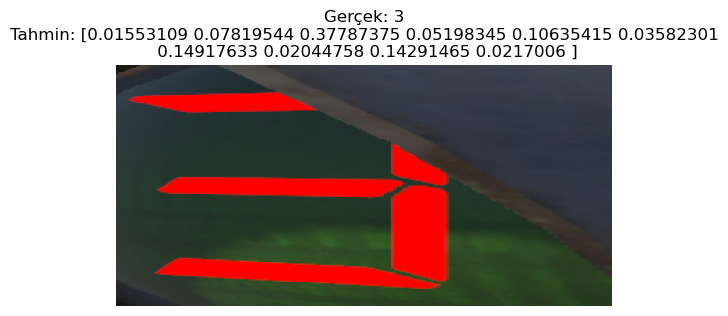

Görüntü silindi: foto_3_(03-14).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Görüntü: foto_4_(03-17).jpg
  Gerçek Değer: 4
  Tahmin: [3.7054060e-04 4.0568594e-02 3.5463017e-03 7.8683760e-04 9.3035650e-01
 2.6631632e-03 6.5621450e-03 3.6028195e-03 8.5838307e-03 2.9592067e-03]


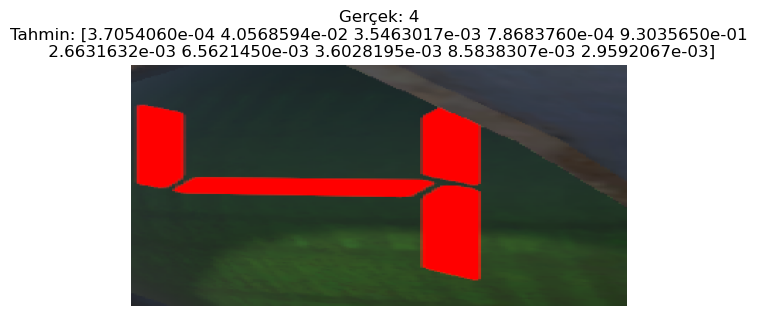

Görüntü silindi: foto_4_(03-17).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Görüntü: foto_5_(03-20).jpg
  Gerçek Değer: 5
  Tahmin: [0.01016252 0.05445366 0.40998203 0.05677394 0.08757042 0.0611003
 0.16392066 0.02027733 0.11823887 0.0175202 ]


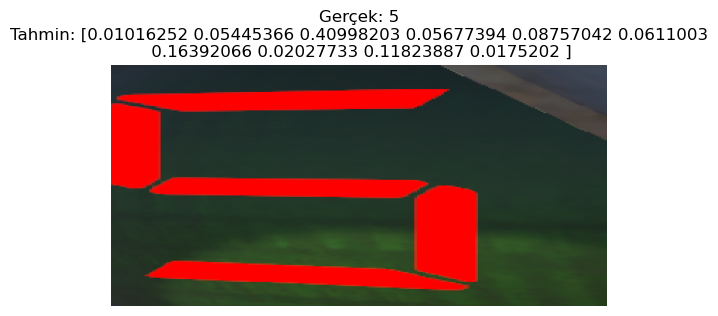

Görüntü silindi: foto_5_(03-20).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Görüntü: foto_6_(03-23).jpg
  Gerçek Değer: 6
  Tahmin: [0.00553725 0.02809469 0.5346673  0.02352972 0.04781993 0.02352806
 0.19619593 0.00707223 0.12892704 0.00462784]


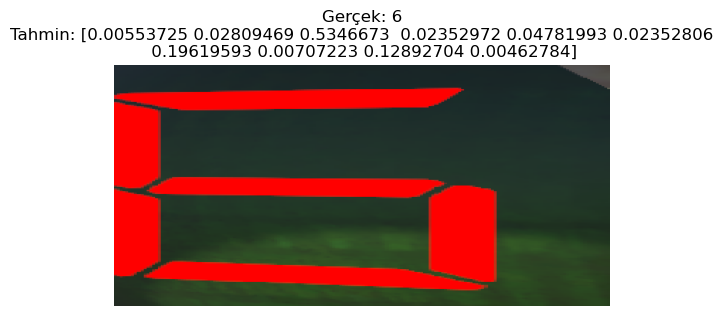

Görüntü silindi: foto_6_(03-23).jpg
Döngü sonlandırıldı.


In [7]:
import os
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Görüntüyü analiz eden ve tahmin yapan fonksiyon
def analyze_image(model, img_path):
    img = image.load_img(img_path, target_size=(170, 350))  # Görüntü boyutu 170x350 olarak ayarlandı
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizasyon
    
    # Gerçek değerleri dosya isminden çıkarma
    match = re.search(r'_(\d+)_', img_path)
    if match:
        true_value = int(match.group(1))
    else:
        true_value = None
    
    # Tahmin yap
    prediction = model.predict(img_array)
    
    return prediction, true_value

# Görüntülerin bulunduğu klasör
folder_path = r'C:\Users\WaLFaLaR\tez\veri\anlıkss'

# Modelinizi yükleyin (Eğer modeliniz daha önce eğitilmiş ve kaydedilmişse)
# Örneğin, modelinizin dosya yolu 'trained_model.keras' ise:
model = tf.keras.models.load_model('trained_model.keras')

# Sonsuz döngü ile klasörü sürekli kontrol etme
while True:
    try:
        # Klasördeki tüm dosyaları al
        files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
        
        if files:
            # En son yüklenen dosyayı al
            file = sorted(files, key=lambda x: os.path.getmtime(os.path.join(folder_path, x)), reverse=True)[0]
            img_path = os.path.join(folder_path, file)
            
            # Görüntüyü analiz et ve tahmin yap
            prediction, true_value = analyze_image(model, img_path)
            
            # Sonuçları yazdırma
            print(f"Görüntü: {file}")
            if true_value is not None:
                print(f"  Gerçek Değer: {true_value}")
            else:
                print("  Gerçek Değer bulunamadı.")
            print(f"  Tahmin: {prediction.flatten()}")
            
            # Görselleştirme
            img = image.load_img(img_path, target_size=(170, 350))
            plt.imshow(img)
            plt.axis('off')
            if true_value is not None:
                plt.title(f"Gerçek: {true_value}\nTahmin: {prediction.flatten()}")
            else:
                plt.title(f"Tahmin: {prediction.flatten()}")
            plt.show()
            
           # Dosyanın mevcut olup olmadığını kontrol et ve sil
            if os.path.exists(img_path):
                os.remove(img_path)
                print(f"Görüntü silindi: {file}")
        
        # Bir saniye bekle
        time.sleep(1)
    except KeyboardInterrupt:
        # Döngüyü sonlandırmak için Ctrl+C
        print("Döngü sonlandırıldı.")
        break
